In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [5]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Image Classification System/Image Classification CNN Keras Dataset/input.csv').values
Y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Image Classification System/Image Classification CNN Keras Dataset/labels.csv').values

X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Image Classification System/Image Classification CNN Keras Dataset/input_test.csv').values
Y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Image Classification System/Image Classification CNN Keras Dataset/labels_test.csv').values

In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.00
X_test = X_test/255.00

In [7]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (1999, 100, 100, 3)
Shape of Y_train :  (1999, 1)
Shape of X_test :  (399, 100, 100, 3)
Shape of Y_test :  (399, 1)


In [8]:
X_train[1, :]

array([[[0.31372549, 0.36078431, 0.34509804],
        [0.3254902 , 0.37647059, 0.34901961],
        [0.29803922, 0.36078431, 0.32156863],
        ...,
        [0.05490196, 0.1372549 , 0.07843137],
        [0.05490196, 0.1372549 , 0.07843137],
        [0.07843137, 0.16078431, 0.10196078]],

       [[0.30588235, 0.34117647, 0.32941176],
        [0.35294118, 0.39607843, 0.37254902],
        [0.30980392, 0.35294118, 0.32156863],
        ...,
        [0.14509804, 0.21176471, 0.14901961],
        [0.12156863, 0.18823529, 0.1254902 ],
        [0.05098039, 0.11764706, 0.05490196]],

       [[0.25098039, 0.25882353, 0.24705882],
        [0.31372549, 0.33333333, 0.30980392],
        [0.36470588, 0.39215686, 0.36078431],
        ...,
        [0.15686275, 0.18039216, 0.1254902 ],
        [0.15686275, 0.18823529, 0.12941176],
        [0.05490196, 0.08627451, 0.02745098]],

       ...,

       [[0.39215686, 0.42745098, 0.36078431],
        [0.36470588, 0.41568627, 0.3372549 ],
        [0.35294118, 0

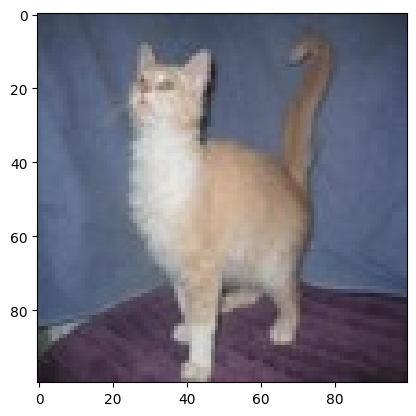

In [9]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


In [10]:
# building a model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [12]:
# train the model

model.fit(X_train, Y_train, epochs=5, batch_size=64)

model.evaluate(X_test, Y_test)

Epoch 1/5
32/32 [==============================] - 34s 1s/step - loss: 0.7125 - accuracy: 0.5108
Epoch 2/5
32/32 [==============================] - 33s 1s/step - loss: 0.6927 - accuracy: 0.5203
Epoch 3/5
32/32 [==============================] - 36s 1s/step - loss: 0.6827 - accuracy: 0.5518
Epoch 4/5
32/32 [==============================] - 33s 1s/step - loss: 0.6667 - accuracy: 0.5908
Epoch 5/5
13/13 [==============================] - 2s 122ms/step - loss: 0.6188 - accuracy: 0.6466


[0.6187513470649719, 0.646616518497467]

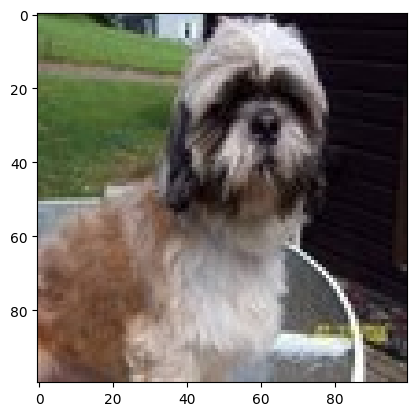

1/1 [==============================] - 0s 26ms/step
[[0.8187598]]
Our model predict, It is a : Cat


In [14]:
# making prediction

idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

y_pred = y_pred > 0.5

if (y_pred == 0):
  pred = 'Dog'
else:
  pred = 'Cat'

print("Our model predict, It is a :", pred)